# HiPSCat datasets and LSDB framework

HiPSCat datasets can be stored and read via
* local disk 
* s3-bucket-like filesystems

They can also be read from an 'almanac' (similar to a registry), which can be inferred from a directory (or bucket) of HiPSCats. 

The almanac will list all available HiPSCats that are in a local directory, or in a valid abstract file system. From there it will also allow the user to instantiate an `lsdb.Catalog` object from the registry. 

## Reading a single catalog

In [1]:
from hipscat.catalog import Catalog
from hipscat.inspection import Almanac,plot_pixels, plot_points
from pathlib import Path

#reading from local disk
path_to_local_catalog = f"{Path.home()}/shared/lincc-frameworks/data/ADASS_Tutorial/gaia_exA"

#instantiate hipscat.Catalog
gaia_small = Catalog.read_from_hipscat(path_to_local_catalog)

#inspection
print(gaia_small.catalog_path)
print(gaia_small, type(gaia_small))

/home/swyatt7/shared/lincc-frameworks/data/ADASS_Tutorial/gaia_exA
<hipscat.catalog.catalog.Catalog object at 0x7f0d146bd790> <class 'hipscat.catalog.catalog.Catalog'>


#### Further inspection: visualization
* `hipscat.inspection.plot_points` -> plotting source distrubtions
* `hipscat.inpsection.plot_pixels` -> plotting hipscat distribution of partition order

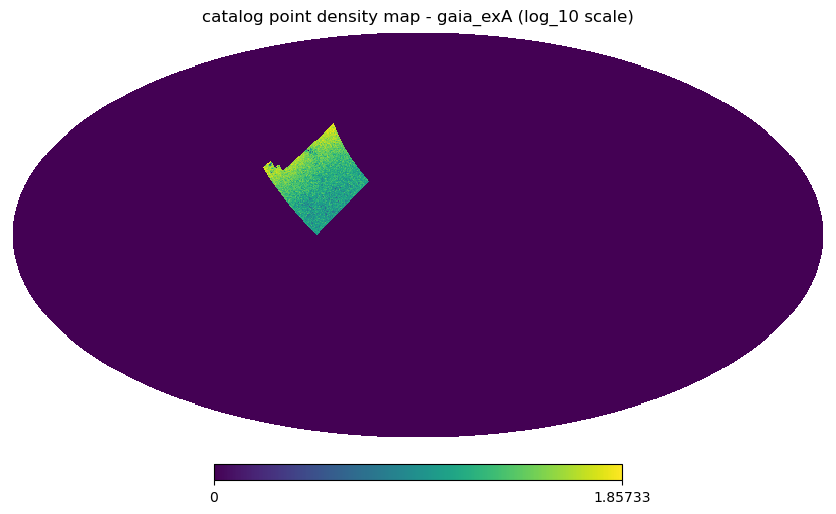

In [2]:
plot_points(gaia_small)

#### Reading a hipscat from a bucket source
We have preloaded catalogs stored in our Microsoft Azure container bucket, here we instantiate one using internal storage options:
```
storage_options = {
    "account_name" : "",
    "account_key"  : "",
}
```

In [3]:
#reading from abstract file source:
from hipscat.ADASS_Tutorial.credentials import read_storage_options
path_to_cloud_catalog = "abfs:///hipscat/catalogs/gaia_dr3"
storage_options = read_storage_options()
gaia = Catalog.read_from_hipscat(path_to_cloud_catalog, storage_options)

print(gaia.catalog_path)
print(gaia, type(gaia))

abfs:///hipscat/catalogs/gaia_dr3
<hipscat.catalog.catalog.Catalog object at 0x7f0d144ec210> <class 'hipscat.catalog.catalog.Catalog'>


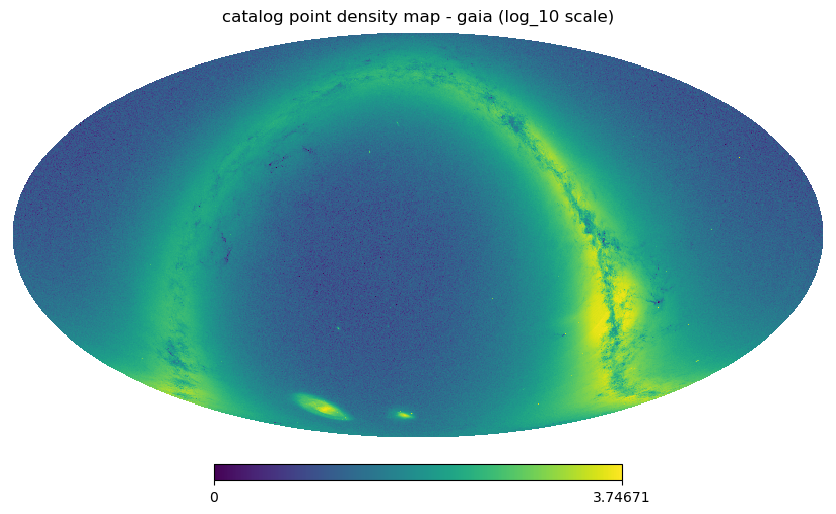

In [4]:
plot_points(gaia)

## Reading HiPSCat's from an 'almanac'

Say you don't know the catalogs you have access too. Either locally or you're given a bucket and you want to load from there.

In [5]:
HIPS_DIR = "abfs:///hipscat/catalogs/almanac"
cloud_almanac = Almanac(dirs=[HIPS_DIR], storage_options=storage_options)
for catalog in cloud_almanac.catalogs():
    print(catalog)


gaia
ztf_dr14
ztf_source


In [6]:
#Loading a hipscat from an almanac
cloud_gaia = cloud_almanac.get_catalog("gaia")
print(cloud_gaia, type(cloud_gaia))

<hipscat.catalog.catalog.Catalog object at 0x7f0d97351ed0> <class 'hipscat.catalog.catalog.Catalog'>


# Basic HiPSCat functionality
Here we will demonstrate the key functionality behind the LSDB software package when it comes to:
* Gathering Catalog Metadata (length)
* Basic Visualization (sources and partions)

In [7]:
cloud_gaia.catalog_info.__dict__

{'catalog_name': 'gaia',
 'catalog_type': 'object',
 'total_rows': 1811711872,
 'epoch': 'J2000',
 'ra_column': 'ra',
 'dec_column': 'dec'}

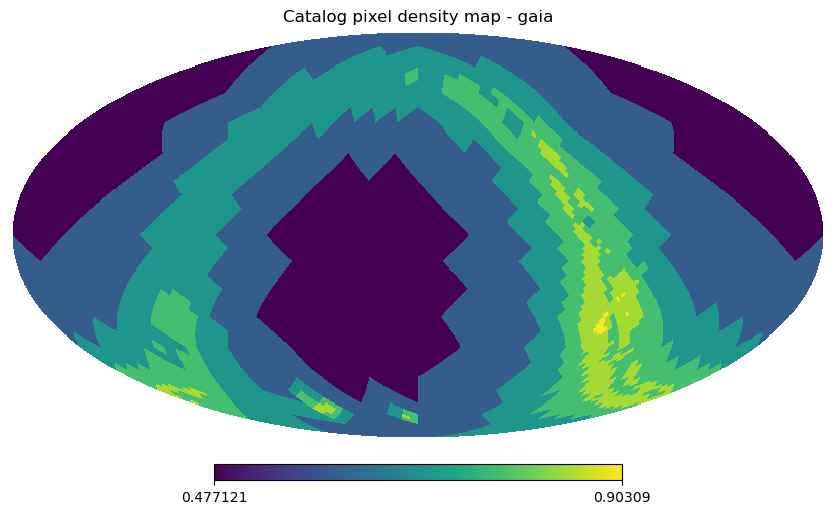

In [8]:
plot_pixels(cloud_gaia)

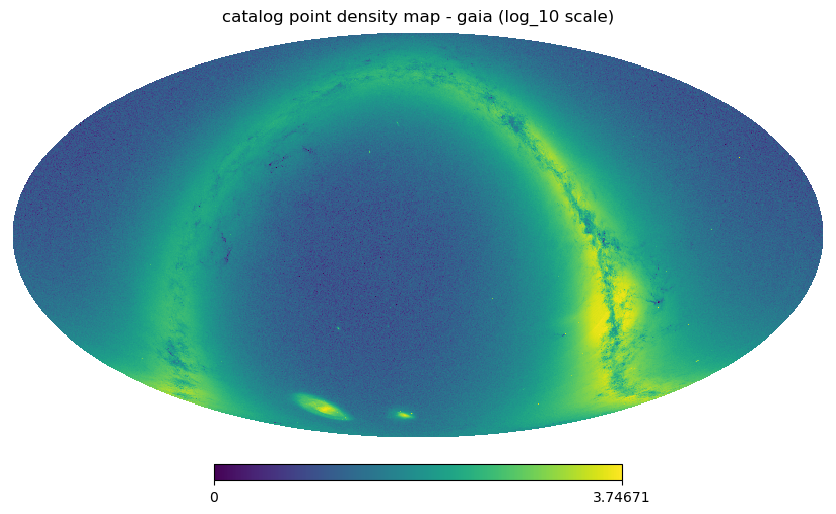

In [9]:
plot_points(cloud_gaia)